### Idea for denoising archetecture
0. Get SDR metrics for the latest model to demonstrate how well it works compared to papers etc...
1. tbf I can include the resnet model by adding the embeddings back in, introducing noise, and training it with the 10 - 30 dB vs no noise, and getting the model to predict the noise.... how do I get the noise value... I think i can get the noise as the added noise + (noisy signal - clean signal)
yea i can do that







And either use MFCC, or Cepstrum

# Dataset Generation

In [4]:
import sys
import os

# Detect Google Colab
if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Environmental Sound Classification 50

In [ ]:
# Detect Google Colab
if "google.colab" in sys.modules:
    print("Running in Google Colab...")
    os.system("git clone https://github.com/CiaranMaloy/audioautoencoder")
    os.chdir("/content/audioautoencoder/")
    os.system("git pull")
    os.system("git checkout bandchannels")
    os.system("git pull origin bandchannels")
    #os.system("pip install --upgrade torchmetrics")
else:
    print("Running locally...")
    os.system("git pull origin bandchannels")
    os.system("pip install --upgrade torchmetrics")


In [ ]:
import sys
sys.path.append('/content/audioautoencoder')
sys.path.append('/content/audioautoencoder/audioautoencoder')

In [ ]:
from audioautoencoder.data import *
from audioautoencoder.outputs import *
from audioautoencoder.processing import *
from audioautoencoder.training import *
from audioautoencoder.datasets.loaders import *
from audioautoencoder.generate_dataset import *
from audioautoencoder.plotting import *

test get item input and output to see if i can use the log magnitude and then reverse it on the output

## Data Generation

In [ ]:
from audioautoencoder.data_management import *

In [ ]:
GENERATE=False

In [ ]:
# Example Usage
if GENERATE:
  dataset_dirs = ["/content/drive/MyDrive/Datasets/Noise/All_Noise"]
  output_dir = "/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2"
  splits = create_datasets(dataset_dirs, output_dir)
  print("Training Set:", len(splits["train"]))
  print("Validation Set:", len(splits["val"]))
  print("Testing Set:", len(splits["test"]))


In [ ]:
if GENERATE:
  save_splits_to_directories(splits, output_dir, max_workers=8)

In [ ]:
# generate audio files for noise and music (2s)
if GENERATE:
  noise_test = output_dir + "/test"
  noise_train = output_dir + "/train"

  noise_test_output = noise_test + "-2s-44100"
  noise_train_output = noise_train + "-2s-44100"

  for input_path, output_path in [(noise_test, noise_test_output), (noise_train, noise_train_output)]:
    print(input_path, output_path)
    generate_audio_files(input_path, output_path, t=2)

In [ ]:
# generate audio files for noise and music (2s)
if False:
  music_test = "/content/drive/MyDrive/Datasets/Music/MUSDB18/test"
  music_train = "/content/drive/MyDrive/Datasets/Music/MUSDB18/train"

  music_test_output = music_test + "-2s-44100"
  music_train_output = music_train + "-2s-44100"

  for input_path, output_path in [(music_test, music_test_output), (music_train, music_train_output)]:
    print(input_path, output_path)
    generate_audio_files(input_path, output_path, t=2)

## Process files to H5

In [ ]:
GENERATE_H5_FILES = False

if GENERATE_H5_FILES:
  checkpoint_file_size=50000
  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep_features',
          SNRdB=[-10, 10],
          process_train=True,
          process_test=True,
          checkpoint_file_size=checkpoint_file_size
      )
  processor.process()

  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep_features',
          SNRdB=[0, 20],
          process_train=True,
          process_test=True,
          checkpoint_file_size=checkpoint_file_size
      )
  processor.process()

  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep_features',
          SNRdB=[10, 30],
          process_train=True,
          process_test=True,
          checkpoint_file_size=checkpoint_file_size
      )
  processor.process()

  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_mix_features',
          SNRdB=[-10, 30],
          process_train=True,
          process_test=True,
          mix_only=True,
          checkpoint_file_size=checkpoint_file_size
      )
  processor.process()

---



## Define Autoencoder structure

## Improvement to UnetAutoencoder

1. changed padding from explicit to on the output of the convolutional layer
2. added batch normalisation between layers
3. changed fro elu to leaky_relu for efficiency
4. in the other one there is no pooling... and the skip connections are done by concatenation?

#### For v3, remove pooling layers, and add attention onto skip connections

In addition, try only music and only crowd as a dataset

In [ ]:
channels = 64

print(channels)
print(channels * 2)
print(channels * 4)
print(channels * 8)
print(channels * 16)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange

## Masking Unet
# enhanced attention on skip connections
# deep 3 headded self attention in bottleneck
class ResBlock(nn.Module):
    def __init__(self, channels:int, num_groups:int, dropout_prob:float, kernel_size=3):
        super().__init__()
        self.relu = nn.ReLU(inplace=True)
        self.gnorm1 = nn.GroupNorm(num_groups=num_groups, num_channels=channels)
        self.gnorm2 = nn.GroupNorm(num_groups=num_groups, num_channels=channels)

        # Adding proper padding calculation to maintain spatial dimensions
        padding = kernel_size // 2 if isinstance(kernel_size, int) else (kernel_size[0] // 2, kernel_size[1] // 2)

        self.conv1 = nn.Conv2d(channels, channels, kernel_size=kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=kernel_size, padding=padding)
        self.dropout = nn.Dropout(p=dropout_prob, inplace=True)

    def forward(self, x):
        r = self.conv1(self.relu(self.gnorm1(x)))
        r = self.dropout(r)
        r = self.conv2(self.relu(self.gnorm2(r)))  # Fixed: use r instead of x for the second conv
        return r + x

class Attention(nn.Module):
    def __init__(self, channels: int, num_heads:int , dropout_prob: float):
        super().__init__()
        self.proj1 = nn.Linear(channels, channels*3)
        self.proj2 = nn.Linear(channels, channels)
        self.num_heads = num_heads
        self.dropout_prob = dropout_prob

    def forward(self, x):
        h, w = x.shape[2:]
        x = rearrange(x, 'b c h w -> b (h w) c')
        x = self.proj1(x)
        x = rearrange(x, 'b L (C H K) -> K b H L C', K=3, H=self.num_heads)
        q,k,v = x[0], x[1], x[2]
        x = F.scaled_dot_product_attention(q,k,v, is_causal=False, dropout_p=self.dropout_prob)
        x = rearrange(x, 'b H (h w) C -> b h w (C H)', h=h, w=w)
        x = self.proj2(x)
        return rearrange(x, 'b h w C -> b C h w')


class ResLayer(nn.Module):
    def __init__(self, channels, kernel_size=3, attention=False, num_groups=16, dropout_prob=0.1, num_heads=8, upscale=False, downscale=False):
        super().__init__()
        self.upscale = upscale
        self.downscale = downscale

        # Calculate proper padding
        padding = kernel_size // 2 if isinstance(kernel_size, int) else (kernel_size[0] // 2, kernel_size[1] // 2)

        self.ResBlock1 = ResBlock(channels=channels, kernel_size=kernel_size, num_groups=num_groups, dropout_prob=dropout_prob)
        self.ResBlock2 = ResBlock(channels=channels, kernel_size=kernel_size, num_groups=num_groups, dropout_prob=dropout_prob)

        if upscale:
            self.conv = nn.ConvTranspose2d(channels, channels // 2, kernel_size=2, stride=2, padding=0)
        elif downscale:
            self.conv = nn.Conv2d(channels, channels * 2, kernel_size=3, stride=2, padding=1)

        if attention:
            self.attention_layer = Attention(channels, num_heads=num_heads, dropout_prob=dropout_prob)

    def forward(self, x):
        x = self.ResBlock1(x)
        if hasattr(self, 'attention_layer'):
            x = self.attention_layer(x)
        x = self.ResBlock2(x)

        if self.upscale:
            x = self.conv(x)
        elif self.downscale:
            x = self.conv(x)

        return x

class EnhancedSkipAttention(nn.Module):
    def __init__(self, encoder_channels, decoder_channels, reduction_ratio=4):
        super().__init__()
        self.channels = encoder_channels

        # Channel attention for encoder features
        self.encoder_channel_attn = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(encoder_channels, encoder_channels // reduction_ratio, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(encoder_channels // reduction_ratio, encoder_channels, kernel_size=1),
            nn.Sigmoid()
        )

        # Projection for decoder features to match encoder dimensions if needed
        self.decoder_proj = None
        if encoder_channels != decoder_channels:
            self.decoder_proj = nn.Conv2d(decoder_channels, encoder_channels, kernel_size=1)

        # Cross-attention between encoder and decoder features
        self.cross_attn = nn.Sequential(
            nn.Conv2d(encoder_channels*2, 2, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, encoder_features, decoder_features):
        # Process decoder features if dimensions don't match
        if self.decoder_proj is not None:
            decoder_features = self.decoder_proj(decoder_features)

        # Apply channel attention to encoder features
        channel_attn = self.encoder_channel_attn(encoder_features)
        encoder_features = encoder_features * channel_attn

        # Concatenate encoder and decoder features
        combined = torch.cat([encoder_features, decoder_features], dim=1)

        # Generate attention weights for each feature set
        attn_weights = self.cross_attn(combined)
        encoder_weight, decoder_weight = torch.split(attn_weights, 1, dim=1)

        # Apply weights and combine features
        result = encoder_features * encoder_weight + decoder_features * decoder_weight

        return result

class UNetConv11(nn.Module):
    # Update from UnetConv6, moving to a masking model, which hopefully works better
    def __init__(self, in_channels=9, out_channels=4):
        super().__init__()

        channels = 64

        # Fixed input layer with proper padding calculation for given kernel size
        self.sigmoid = nn.Sigmoid()
        self.input_layer = nn.Sequential(
            nn.Conv2d(in_channels, channels, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(channels),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(channels),
            nn.LeakyReLU(0.2, inplace=True),
        )

        # Encoder (Downsampling) - using standard kernel sizes with proper padding
        self.enc1 = ResLayer(channels, kernel_size=3, downscale=True)
        self.enc2 = ResLayer(channels * 2, kernel_size=3, downscale=True)
        self.enc3 = ResLayer(channels * 4, kernel_size=3, downscale=True)
        self.enc4 = ResLayer(channels * 8, kernel_size=3, downscale=True)

        # Bottleneck
        self.bottleneck_in = ResLayer(channels * 16, kernel_size=3)
        self.resattention = ResLayer(channels * 16, kernel_size=3, attention=True)
        self.bottleneck_out = ResLayer(channels * 16, kernel_size=3)

        # Decoder (Upsampling) - using standard kernel sizes
        self.dec4 = ResLayer(channels * 16, kernel_size=3, upscale=True)
        self.dec3 = ResLayer(channels * 8, kernel_size=3, upscale=True)
        self.dec2 = ResLayer(channels * 4, kernel_size=3, upscale=True)
        self.dec1 = ResLayer(channels * 2, kernel_size=3, upscale=True)

        # Final output layer
        self.output_layer = nn.Sequential(
            nn.Conv2d(channels, out_channels, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

        # Initialize Spatial Attention Modules
        self.attn4 = EnhancedSkipAttention(channels * 16, channels * 16)
        self.attn3 = EnhancedSkipAttention(channels * 8, channels * 8)
        self.attn2 = EnhancedSkipAttention(channels * 4, channels * 4)
        self.attn1 = EnhancedSkipAttention(channels * 2, channels * 2)

    def forward(self, x):
        """Forward pass with skip connections"""
        input_shape = x.shape[2:]  # Remember original input spatial dimensions

        # Encoding
        input_features = self.input_layer(x)
        e1 = self.enc1(input_features)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        e4 = self.enc4(e3)

        # Bottleneck
        b = self.bottleneck_in(e4)
        b = self.resattention(b)
        b = self.bottleneck_out(b)

        # Decoding with proper feature alignment
        # For decoder stage 4
        b = F.interpolate(b, size=e4.shape[2:], mode="bilinear", align_corners=False)
        d4 = self.attn4(e4, b)
        d4 = self.dec4(d4)

        # For decoder stage 3
        d4 = F.interpolate(d4, size=e3.shape[2:], mode="bilinear", align_corners=False)
        d3 = self.attn3(e3, d4)
        d3 = self.dec3(d3)

        # For decoder stage 2
        d3 = F.interpolate(d3, size=e2.shape[2:], mode="bilinear", align_corners=False)
        d2 = self.attn2(e2, d3)
        d2 = self.dec2(d2)

        # For decoder stage 1
        d2 = F.interpolate(d2, size=e1.shape[2:], mode="bilinear", align_corners=False)
        d1 = self.attn1(e1, d2)
        d1 = self.dec1(d1)

        # Final output with bilinear interpolation to match input size
        mask = self.output_layer(d1)
        mask = F.interpolate(mask, size=input_shape, mode="bilinear", align_corners=False)

        # Apply mask to the first 4 channels of input
        return x[:, :4] * mask

In [ ]:
BATCH_SIZE = 4
TEST_MODEL = True

In [ ]:
if TEST_MODEL:
  if __name__ == "__main__":
      x = torch.randn((BATCH_SIZE, 9, 1025, 175))
      model = UNetConv11()
      output = model(x)

      print('output....')
      print(output.shape)

In [ ]:
import unittest
import torch
from torchsummary import summary

class TestAutoencoder(unittest.TestCase):
    def setUp(self):
        self.model = UNetConv11()
        self.input_channels = 9
        self.output_channels = 4
        self.input_height = 1025
        self.input_width = 175
        self.batch_size = BATCH_SIZE
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def test_model_initialization(self):
        self.assertIsInstance(self.model, UNetConv11, "Model initialization failed")

    def test_forward_pass(self):
        x = torch.randn(self.batch_size, self.input_channels, self.input_height, self.input_width, device=self.device)
        output = self.model(x)
        self.assertEqual(
            output.shape,
            (self.batch_size, self.output_channels, self.input_height, self.input_width),
            f"Expected output shape {(self.batch_size, self.output_channels, self.input_height, self.input_width)}, but got {output.shape}"
        )

    def test_model_summary(self):
        try:
            summary(self.model, input_size=(self.input_channels, self.input_height, self.input_width))
        except Exception as e:
            self.fail(f"Model summary failed: {str(e)}")

# This allows running tests externally
def suite():
    test_suite = unittest.TestLoader().loadTestsFromTestCase(TestAutoencoder)
    return test_suite

# runner
class TestRunner:
    def __init__(self):
        self.runner = unittest.TextTestRunner()

    def run(self):
        print("Running autoencoder tests...")
        self.runner.run(suite())

if TEST_MODEL:
  if __name__ == "__main__":
      runner = TestRunner()
      runner.run()

## First train as an autoencoder for music

## Download file to local

In [ ]:
from audioautoencoder.plotting import *
from audioautoencoder.datasets.utils import *

In [ ]:
from audioautoencoder.models.UNetConv10mask import *
# Instantiate the model, define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetConv10().to(device)

print(device)

In [ ]:
i = 0
train = False
LOAD_DATA = False
load_model = True

# --------------- Main Execution parameters ---------------
model_name = 'UNetConv10_mask'
SNRdB_load = [-10, 10]
SNRdBs = [[-10, 10]] # SNR random range
load_trigger = [load_model]
load_file = 'Autoencodermodel_earlystopping.pth'
#load_file = 'Autoencodermodel_checkpoint.pth'

folder = ['sep_features'][i] # sep

# parameters
learning_rates = [1e-3] # 1e-4 for re0training?, 1e-3 for training?

base_lr=1e-5
max_lr=learning_rates[i]
gamma=0.8

# data params
max_file_size_gb = 100
IMPORT_TRAIN_NOISY = train
batch_size = 64

# training params
load = load_trigger[i]
warm_start = False
epochs = 30
accumulation_steps = int(512/batch_size)

SNRdB = SNRdBs[i]
learning_rate = learning_rates[i]
eta_min = 1e-5

print('lr:', learning_rate)
print('SNRdB:', SNRdB)

In [ ]:
# --------------- In Loop Parameters --------------
output_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_{model_name}_{SNRdB[0]}-{SNRdB[1]}/'
load_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/{load_file}'

In [ ]:
import os
import joblib  # or use pickle if you prefer

def save_scalers(scalers, save_path):
    """Save scalers to a file."""
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    joblib.dump(scalers, save_path)

def load_scalers(save_path):
    """Load scalers from a file."""
    return joblib.load(save_path)

In [ ]:
# Define the source and destination file paths
if LOAD_DATA:
  scaler_file = output_path + "scalers.pkl"  # Static filename since it's unique per run
  source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_{folder}/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
  source_path = source_folder + "train/"
  destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/train/"
  save_path = source_folder + "combined_000.h5"
  subset = False

  if IMPORT_TRAIN_NOISY:
    dataset_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/train/combined_000.h5"
    if not os.path.exists(destination_path):
      combine_h5_files_features(source_path, destination_path, max_file_size_gb=max_file_size_gb)

    if os.path.exists(scaler_file):
        print("Loading existing scalers...")
        scalers = load_scalers(scaler_file)
    else:
        print("Training new scalers...")
        scalers = train_scalers_separation(dataset_path, sample_size=8000)
        save_scalers(scalers, scaler_file)

    print(scalers)

    train_loader = ChannelDatasetLoader(
          dataset_path=dataset_path,
          scalers=scalers,
          output_time_length=175,
          channels=1,
          snr_db=SNRdB,
          subset=subset,
          batch_size=batch_size
      )

    print(f"Training set size: {len(train_loader.train_dataset)}")
    print(f"Validation set size: {len(train_loader.val_dataset)}")

In [ ]:
if LOAD_DATA:
  input, output, medatata = train_loader.train_dataset[200]
  print(input.shape)
  print(output.shape)

In [ ]:
if LOAD_DATA:
  import matplotlib.pyplot as plt
  import torch

  # Fetch a sample
  input_tensor, output_tensor, metadata = train_loader.train_dataset[50]

  # Convert to NumPy for plotting
  input_array = input_tensor.numpy()
  output_array = output_tensor.numpy()

  # Number of input channels
  num_channels_in = input_array.shape[0]
  num_channels_out = output_array.shape[0]

  # Create subplots
  fig, axes = plt.subplots(num_channels_in + num_channels_out, 1, figsize=(15, 30))

  # Plot each input channel
  for i in range(num_channels_in):
      input = input_array[i]
      print('Min, Max: ', np.min(input), np.max(input))
      im = axes[i].imshow(input, aspect='auto', cmap='magma')
      axes[i].invert_yaxis()

      axes[i].set_title(f"Input Channel {i+1}")
      axes[i].axis("off")

      # Add colorbar
      cbar = fig.colorbar(im, ax=axes[i], orientation="vertical")
      cbar.set_label("Amplitude")

    # Plot each input channel
  for i in range(num_channels_out):
      output = output_array[i]
      print('Min, Max: ', np.min(output), np.max(output))
      im = axes[num_channels_in + i].imshow(output, aspect='auto', cmap='magma')
      axes[num_channels_in + i].invert_yaxis()

      axes[num_channels_in + i].set_title(f"Output Channel {i+1}")
      axes[num_channels_in + i].axis("off")

      # Add colorbar
      cbar = fig.colorbar(im, ax=axes[num_channels_in + i], orientation="vertical")
      cbar.set_label("Amplitude")

  plt.tight_layout()
  plt.show()


# Retrain Model

In [24]:
from audioautoencoder.loss import *
from audioautoencoder.utils import *

In [25]:
import torch

torch.cuda.empty_cache()

In [26]:
if load:
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
  #scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=eta_min)
  scheduler_loss = False
else:
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=eta_min)
  scheduler_loss = False

  #optimizer = None #torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
  #scheduler = None #torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)
  #scheduler_loss = False #True

In [27]:
import torch
import gc

def clear_gpu_memory():
    """Clears all allocated GPU memory in PyTorch."""
    torch.cuda.empty_cache()  # Clears cache
    gc.collect()  # Runs Python garbage collector
    for i in range(torch.cuda.device_count()):
        torch.cuda.reset_peak_memory_stats(i)  # Resets peak memory tracking

clear_gpu_memory()


In [28]:
if train:
  trainer = DenoisingTrainer(
      model=model, noisy_train_loader=train_loader.train_loader, noisy_val_loader=train_loader.val_loader,
      SNRdB=SNRdB, output_path=output_path, epochs=epochs, learning_rate=learning_rate,
      load=load, warm_start=warm_start, train=train, verbose=False, accumulation_steps=accumulation_steps, load_path=load_path,
      base_lr=base_lr, max_lr=max_lr, gamma=gamma, optimizer=optimizer, scheduler=scheduler, scheduler_loss=scheduler_loss,
      max_noise=0.01, noise_epochs=5
  )
  trainer.train_or_evaluate()
  model = trainer.get_model()

  # I need a flat load model function somewhere, as now I need to define a train loader before I can load a model
  csv_file_path = output_path + "training_log.csv"
  plot_training_log(csv_file_path)

## Testing

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetConv10().to(device)
denoiser = DenoisingLoader(model, load_path)
model = denoiser.model
print('Loaded Model')

# Example input (batch_size=1, channels=2, height=1025, width=175)
noisy_input = torch.randn(1, 9, 1025, 175)

denoised_output = denoiser.denoise(noisy_input)
print(denoised_output.shape)

/content/audioautoencoder/audioautoencoder/training.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=self.device)


Loaded model from /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv10_mask_-10-10/Autoencodermodel_earlystopping.pth
Loaded Model
torch.Size([1, 4, 1025, 175])


## Testing:

In [30]:
# Define the source and destination file paths
SNRdB = SNRdB # SNR random range
print(SNRdB)
#filename = f"train-SNRdB_{SNRdB}-1s-44-1khz-magnitude-freqweightmagnitude-phase.h5"
source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_{folder}/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
source_path = source_folder + "test/"
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"
scaler_file = output_path + "scalers.pkl"  # Static filename since it's unique per run

save_path = destination_path + "combined_000.h5"

[-10, 10]


In [66]:
IMPORT_TEST_NOISY = True
load_dataframe = True

In [67]:
max_file_size_gb = 50

In [68]:
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"

if IMPORT_TEST_NOISY:
  if not os.path.exists(destination_path):
    combine_h5_files_features(source_path, destination_path, max_file_size_gb=max_file_size_gb)

View Pretrained Model Performance

In [69]:
from audioautoencoder.datasets.utils import *

In [70]:
if os.path.exists(scaler_file):
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
else:
    print("Training new scalers...")
    scalers = train_scalers_separation(dataset_path, sample_size=8000)
    save_scalers(scalers, scaler_file)

Loading existing scalers...


In [71]:
if IMPORT_TEST_NOISY:
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
    test_loader = ChannelDatasetLoader(
          dataset_path=save_path,
          scalers=scalers,
          output_time_length=175,
          channels=1,
          snr_db=SNRdB,
          subset=True,
          batch_size=4
      )

    print(f"Training set size: {len(test_loader.train_dataset)}")
    print(f"Validation set size: {len(test_loader.val_dataset)}")

Loading existing scalers...
Dataset size: 17760
Training set size: 4972
Validation set size: 1243
Training set size: 4972
Validation set size: 1243


In [72]:
!git pull

Already up to date.


In [73]:
os.system("pip install --upgrade torchmetrics")

0

In [74]:
from audioautoencoder.testing import *

In [75]:
if load_dataframe:
  df_subset = pd.read_csv(output_path + f"df_subset_SNRdB_{SNRdB[0]}-{SNRdB[1]}.csv")

In [62]:
if not load_dataframe:
  criterion = nn.L1Loss()
  loss, df_eval = test_model(model, test_loader.train_loader, criterion, scalers)

Testing:   2%|▏         | 29/1243 [00:07<05:32,  3.65batch/s, loss=0.1606]


KeyboardInterrupt: 

In [76]:
if not load_dataframe:
  # Assuming `df` is your original dataframe
  #df_eval["Improvement"] = df_eval["l1_outvstar"] df_eval["l1_invstar"]  # Higher SDR is better
  subset_columns = ["instance", "l1_invstar", "l1_outvstar", "l1_invstar_4k", "l1_outvstar_4k", "l1_invstar_full", "l1_outvstar_full",  "filename", "snr_db"] #"Improvement"]
  df_subset = df_eval#[subset_columns]

In [77]:
if not load_dataframe:
  # Create a function to map filename to a class
  def get_class_from_filename(filename, classes):
      for keyword in classes:
          if keyword in filename:
              return keyword
      return 'Unknown'  # Default if no match found

  df_subset[['filename_audio', 'filename_noise']] = pd.DataFrame(df_subset['filename'].tolist(), index=df_subset.index)
  df_subset['filename_audio'] = df_subset['filename_audio'].apply(lambda x: x.decode('utf-8'))
  df_subset['filename_noise'] = df_subset['filename_noise'].apply(lambda x: x.decode('utf-8'))

  classes = ['mixture', 'vocals', 'drums', 'guitar', 'bass', 'piano', 'electric_guitar', 'acoustic_guitar', 'synthesizer', 'strings', 'brass']
  df_subset['audio_class'] = df_subset['filename_audio'].apply(lambda x: get_class_from_filename(x, classes))

  classes = ['0707', 'Rain', 'Crowd', 'Water', 'Ice']
  df_subset['noise_class'] = df_subset['filename_noise'].apply(lambda x: get_class_from_filename(x, classes))


In [78]:
df_subset["Improvement_L1"] = df_subset["l1_invstar"] - df_subset["l1_outvstar"]  # Lower L1 loss is better
df_subset["Improvement_L1_4k"] = df_subset["l1_invstar_4k"] - df_subset["l1_outvstar_4k"]  # Lower L1 loss is better
df_subset["Improvement_L1_full"] = df_subset["l1_invstar_full"] - df_subset["l1_outvstar_full"]  # Lower L1 loss is better

In [79]:
def threshold_spectrogram(spectrogram, threshold):
    """
    Zeroes out all values in the spectrogram that are below the given threshold.

    Args:
        spectrogram (np.ndarray): Input 2D array.
        threshold (float): The threshold value.

    Returns:
        np.ndarray: The processed spectrogram with values below threshold set to zero.
    """
    spectrogram = np.where(spectrogram >= threshold, spectrogram, 0)
    return spectrogram

In [80]:
sampling_rate = 44100  # 44.1 kHz audio
n_fft = 2048  # Adjust this for better resolution
freqs = np.linspace(0, sampling_rate / 2, n_fft // 2 + 1)  # STFT frequency bins

# Find indices corresponding to 0–4000 Hz
min_freq, max_freq = 0, 4000
freq_indices = np.where((freqs >= min_freq) & (freqs <= max_freq))[0]

# in spectrogram
index = 40

snr_db = np.array(df_subset.loc[index, "snr_db"])
print(snr_db)

# lets evaluate this from a l1 loss perspective
# reconstruct spectrogram
out_spectrogram = np.array(df_subset.loc[index, "out_track"][0])
out_spectrogram[df_subset.loc[index, "metadata"]["freq_indices_hf"], :] = resample_feature(np.array(df_subset.loc[index, "out_track"][1]), df_subset.loc[index, "metadata"]["hf_shape"])
out_spectrogram[df_subset.loc[index, "metadata"]["freq_indices_mf"], :] = resample_feature(np.array(df_subset.loc[index, "out_track"][2]), df_subset.loc[index, "metadata"]["mf_shape"])
out_spectrogram[df_subset.loc[index, "metadata"]["freq_indices_lf"], :] = resample_feature(np.array(df_subset.loc[index, "out_track"][3]), df_subset.loc[index, "metadata"]["lf_shape"])
out_spec_copy = out_spectrogram

out_spectrogram = threshold_spectrogram(out_spectrogram, np.mean(out_spectrogram)*0.75)

# out, with no join
out_track = np.array(df_subset.loc[index, "out_track"])[0]

# out spectrogram
in_spectrogram = df_subset.loc[index, "in_track"][0]

# target
tar_track = np.array(df_subset.loc[index, "tar_track"])[0]

# inverse normalisation to 0 - 1
out_spectrogram = (out_spectrogram - 0.5) * 3
out_track = (out_track - 0.5) * 3
in_spectrogram = (in_spectrogram - 0.5) * 3
tar_track = (tar_track - 0.5) * 3

# Inverse standardisation
input_temp = tar_track
in_spectrogram = scalers["input_features_spectrogram"].inverse_transform(in_spectrogram.reshape(1, -1)).reshape(input_temp.shape)

out_spectrogram = scalers["target_features_spectrogram"].inverse_transform(out_spectrogram.reshape(1, -1)).reshape(input_temp.shape)
out_track = scalers["target_features_spectrogram"].inverse_transform(out_track.reshape(1, -1)).reshape(input_temp.shape)

tar_track = scalers["target_features_spectrogram"].inverse_transform(tar_track.reshape(1, -1)).reshape(input_temp.shape)

# plot things
# Plot spectrograms
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

axes[0].imshow(in_spectrogram, aspect="auto", cmap="magma", origin="lower")
axes[0].set_title("Noisy Input (Log Scale)")
axes[0].set_yscale("log")
axes[0].set_ylim((1, 1000))

axes[1].imshow(out_spectrogram, aspect="auto", cmap="magma", origin="lower")
axes[1].set_title("Denoised Output (Log Scale) - reconstructed")
axes[1].set_yscale("log")
axes[1].set_ylim((1, 1000))

axes[2].imshow(out_track, aspect="auto", cmap="magma", origin="lower")
axes[2].set_title("Denoised Output (Log Scale)")
axes[2].set_yscale("log")
axes[2].set_ylim((1, 1000))

axes[3].imshow(tar_track, aspect="auto", cmap="magma", origin="lower")
axes[3].set_title("Clean Target (Log Scale)")
axes[3].set_yscale("log")
axes[3].set_ylim((1, 1000))

plt.tight_layout()
plt.show()

7.291223526000977


TypeError: string indices must be integers, not 'str'

In [81]:
def magphase_to_waveform(magnitude, phase, audio_length=44100):
    """
    Converts a spectrogram image back into an audio waveform.

    Parameters:
        image (np.array): Spectrogram image (3 channels).
        sr (int): Sampling rate.

    Returns:
        np.array: Reconstructed audio waveform.
    """
    stft = magnitude * np.exp(1j * phase)
    return librosa.istft(stft, length=audio_length)

In [48]:
import scipy.io.wavfile
from google.colab import files
import librosa

# output waveform
phase = df_subset.loc[index, "metadata"]["phase"]
#phase = scalers["input_features_phase"].inverse_transform(phase.reshape(1, -1)).reshape(input_temp.shape)
print(np.max(phase))
print(np.min(phase))

# reverse log scale
out_spectrogram = librosa.db_to_amplitude(out_spectrogram)
signal = magphase_to_waveform(out_spectrogram, phase, 44100 * 2)

# Save as WAV file
output_filename = f"denoised_audio_{index}:{snr_db}.wav"
scipy.io.wavfile.write(output_filename, rate=44100, data=signal)  # 16-bit PCM

# Download the file
files.download(output_filename)

tar_track = librosa.db_to_amplitude(tar_track)
signal = magphase_to_waveform(tar_track, phase, 44100 * 2)

# Save as WAV file
output_filename = f"audio_{index}:{snr_db}.wav"
scipy.io.wavfile.write(output_filename, rate=44100, data=signal)  # 16-bit PCM

# Download the file
files.download(output_filename)

in_spectrogram = librosa.db_to_amplitude(in_spectrogram)
signal = magphase_to_waveform(in_spectrogram, phase, 44100 * 2)

# Save as WAV file
output_filename = f"noisy_audio_{index}:{snr_db}.wav"
scipy.io.wavfile.write(output_filename, rate=44100, data=signal)  # 16-bit PCM

# Download the file
files.download(output_filename)

3.1415927
-3.1415615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set minimal theme
sns.set_theme(style="white", font_scale=1.2)

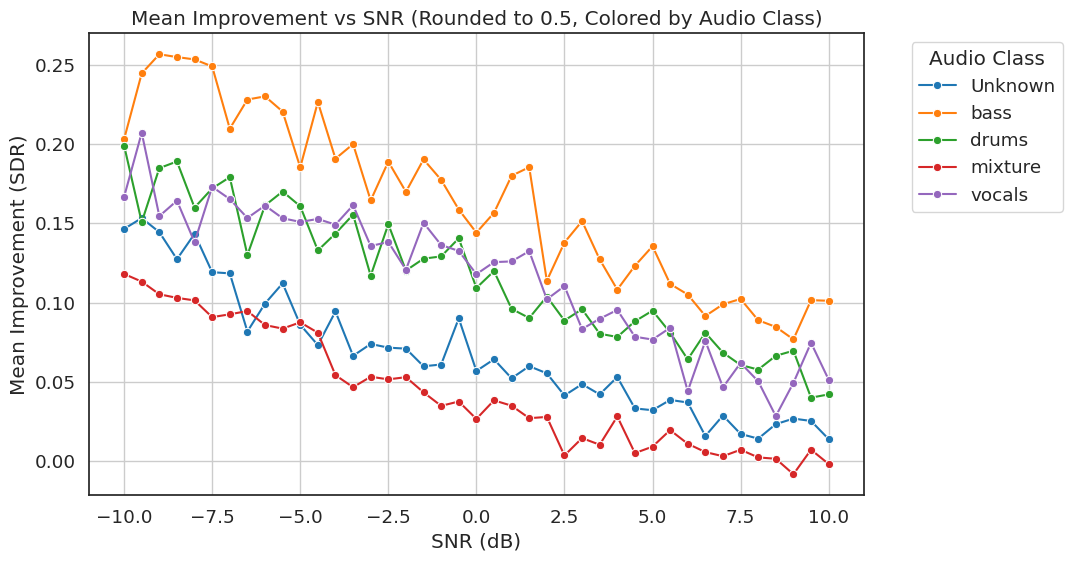

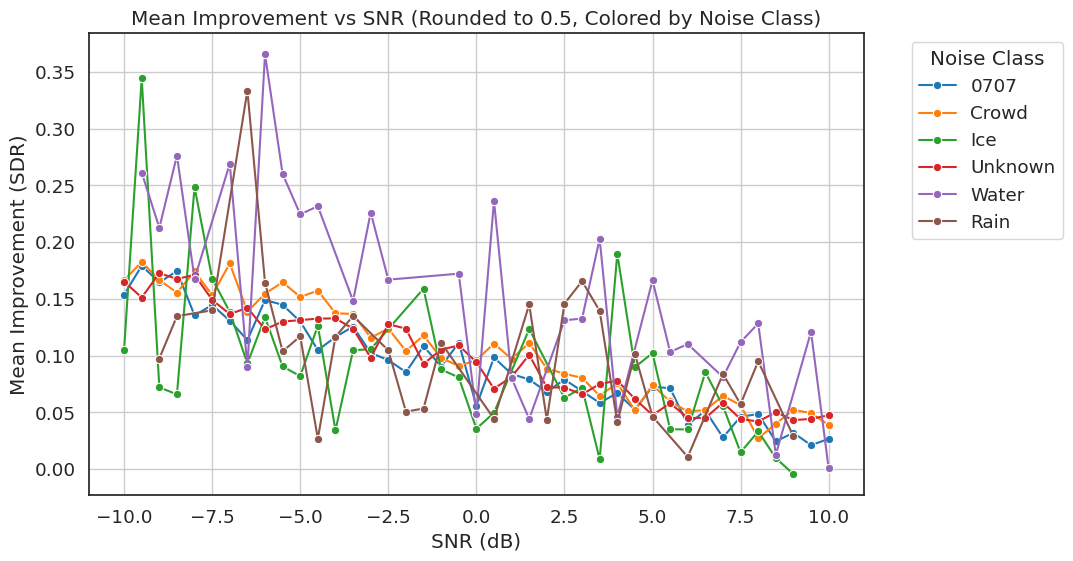

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_eval = df_subset

# Round SNR values to the nearest 0.5 to reduce noise
df_eval["snr_db_rounded"] = df_eval["snr_db"].round(1)  # Rounds to 1 decimal place
df_eval["snr_db_rounded"] = (df_eval["snr_db_rounded"] * 2).round() / 2  # Ensures nearest 0.5

# Group by rounded SNR and audio/noise class, then compute mean improvement
df_audio_avg = df_eval.groupby(["snr_db_rounded", "audio_class"], as_index=False)["Improvement_L1"].mean()
df_noise_avg = df_eval.groupby(["snr_db_rounded", "noise_class"], as_index=False)["Improvement_L1"].mean()

# Line plot colored by 'audio_class'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_audio_avg, x="snr_db_rounded", y="Improvement_L1", hue="audio_class", palette="tab10", marker="o")
plt.xlabel("SNR (dB)")
plt.ylabel("Mean Improvement (SDR)")
plt.title("Mean Improvement vs SNR (Rounded to 0.5, Colored by Audio Class)")
plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

# Line plot colored by 'noise_class'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_noise_avg, x="snr_db_rounded", y="Improvement_L1", hue="noise_class", palette="tab10", marker="o")
plt.xlabel("SNR (dB)")
plt.ylabel("Mean Improvement (SDR)")
plt.title("Mean Improvement vs SNR (Rounded to 0.5, Colored by Noise Class)")
plt.legend(title="Noise Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


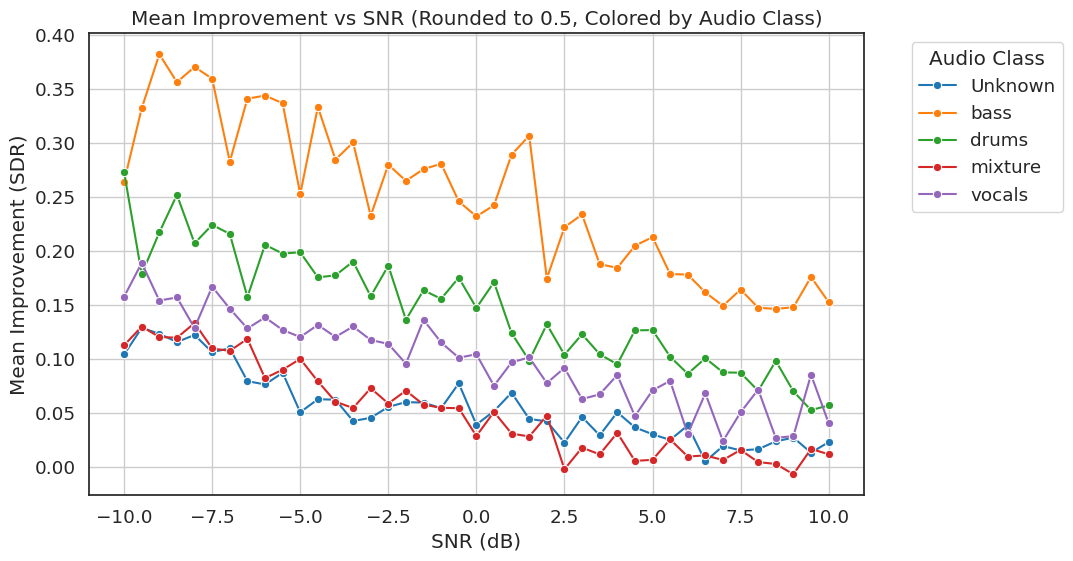

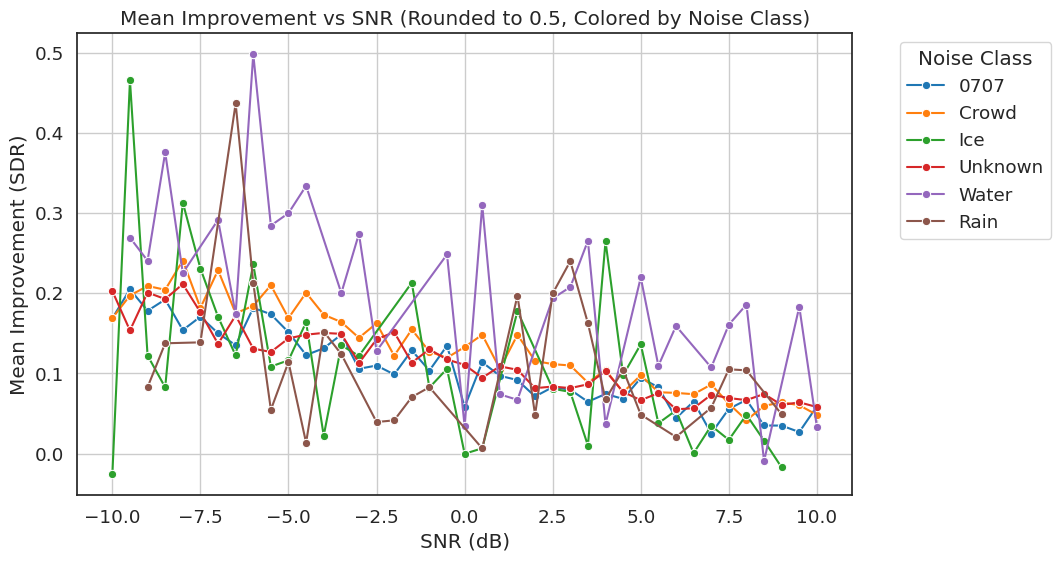

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_eval = df_subset

# Round SNR values to the nearest 0.5 to reduce noise
df_eval["snr_db_rounded"] = df_eval["snr_db"].round(1)  # Rounds to 1 decimal place
df_eval["snr_db_rounded"] = (df_eval["snr_db_rounded"] * 2).round() / 2  # Ensures nearest 0.5

# Group by rounded SNR and audio/noise class, then compute mean improvement
df_audio_avg = df_eval.groupby(["snr_db_rounded", "audio_class"], as_index=False)["Improvement_L1_4k"].mean()
df_noise_avg = df_eval.groupby(["snr_db_rounded", "noise_class"], as_index=False)["Improvement_L1_4k"].mean()

# Line plot colored by 'audio_class'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_audio_avg, x="snr_db_rounded", y="Improvement_L1_4k", hue="audio_class", palette="tab10", marker="o")
plt.xlabel("SNR (dB)")
plt.ylabel("Mean Improvement (SDR)")
plt.title("Mean Improvement vs SNR (Rounded to 0.5, Colored by Audio Class)")
plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

# Line plot colored by 'noise_class'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_noise_avg, x="snr_db_rounded", y="Improvement_L1_4k", hue="noise_class", palette="tab10", marker="o")
plt.xlabel("SNR (dB)")
plt.ylabel("Mean Improvement (SDR)")
plt.title("Mean Improvement vs SNR (Rounded to 0.5, Colored by Noise Class)")
plt.legend(title="Noise Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


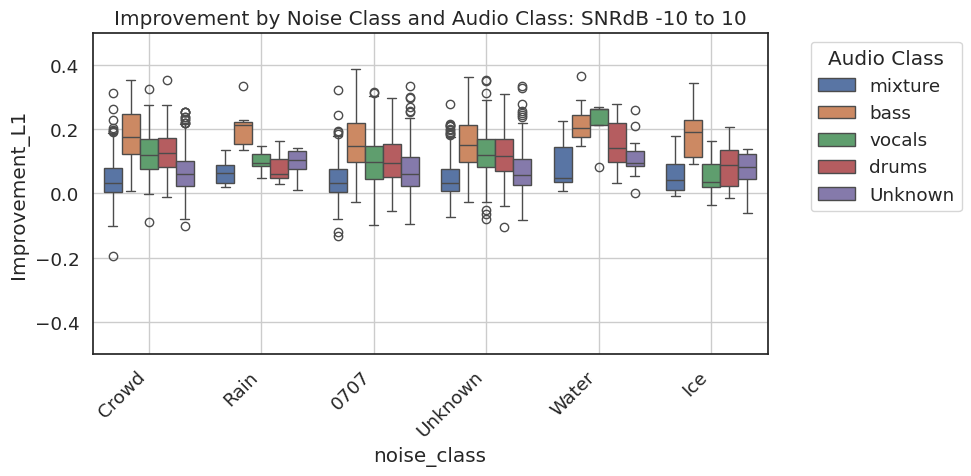

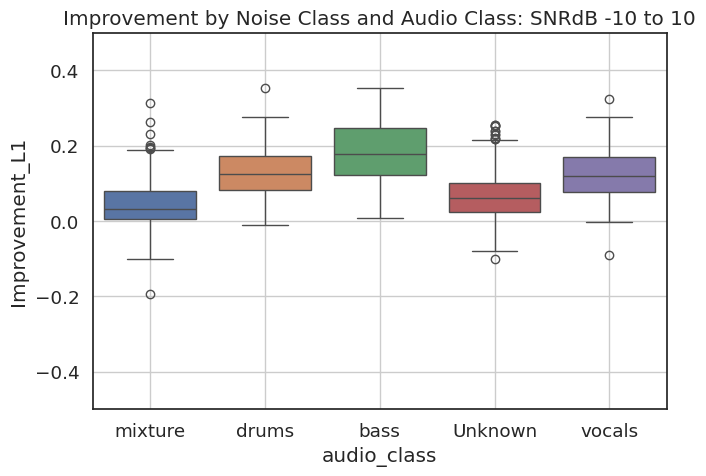

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_subset

# Create a grouped boxplot
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="noise_class", y="Improvement_L1", hue="audio_class", data=df)

# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.ylim(-0.5, 0.5)
plt.savefig(output_path + f"boxplot_all_L1.png")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 'crowd' noise class
df_crowd = df_subset[df_subset["noise_class"] == "Crowd"].copy()

# Create a grouped boxplot
plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="audio_class", y="Improvement_L1", hue="audio_class", data=df_crowd)

# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks()
#plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.ylim(-0.5, 0.5)
plt.savefig(output_path + f"boxplot_crowd_L1.png")
plt.show()


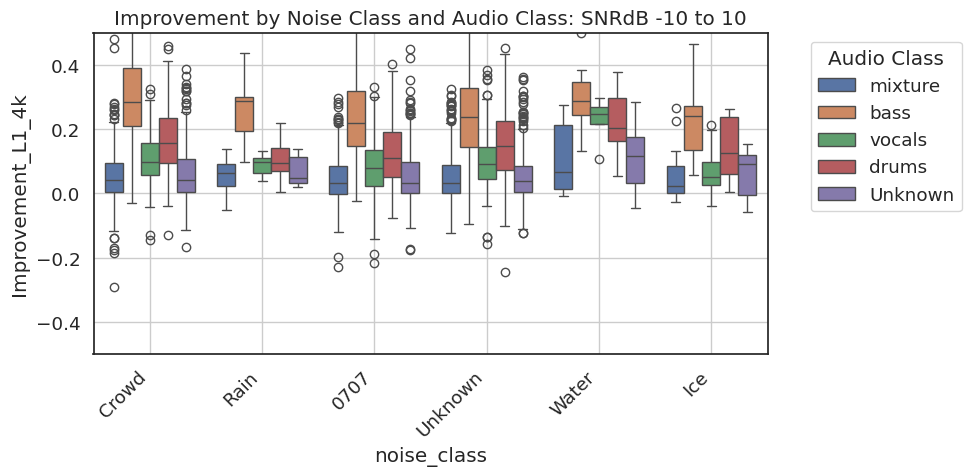

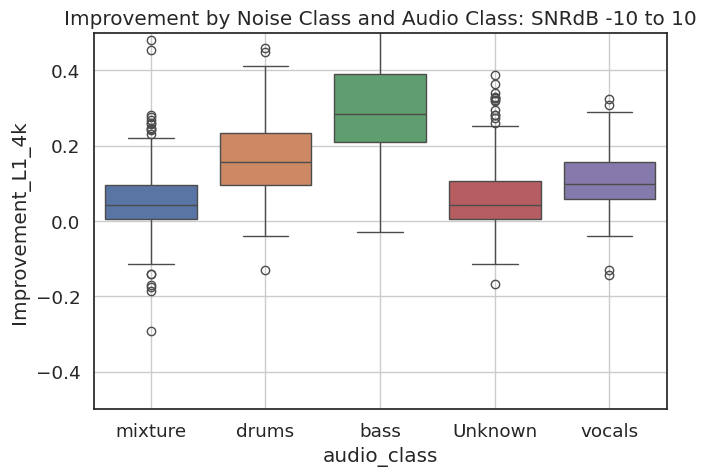

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_subset

# Create a grouped boxplot
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="noise_class", y="Improvement_L1_4k", hue="audio_class", data=df)


# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.ylim(-0.5, 0.5)
plt.savefig(output_path + f"boxplot_all_L1_4k.png")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 'crowd' noise class
df_crowd = df_subset[df_subset["noise_class"] == "Crowd"].copy()

# Create a grouped boxplot
plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="audio_class", y="Improvement_L1_4k", hue="audio_class", data=df_crowd)


# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks()
#plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.ylim(-0.5, 0.5)
plt.savefig(output_path + f"boxplot_crowd_L1_4k.png")
plt.show()


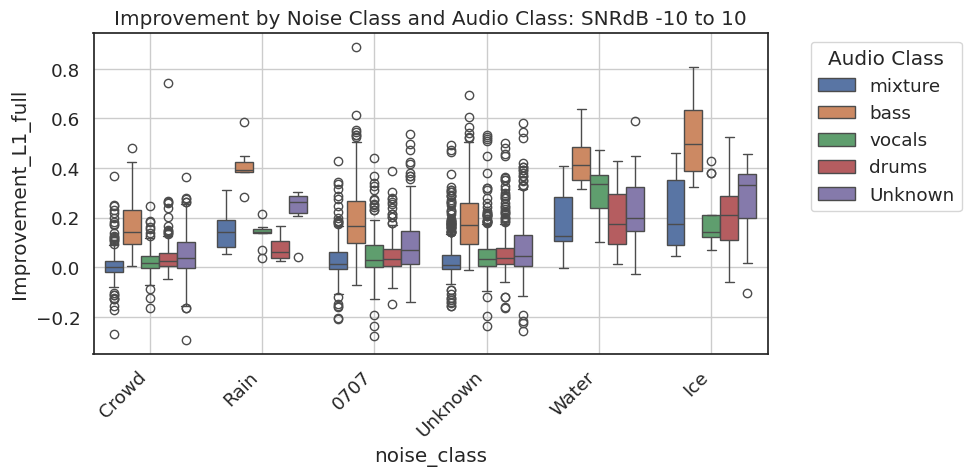

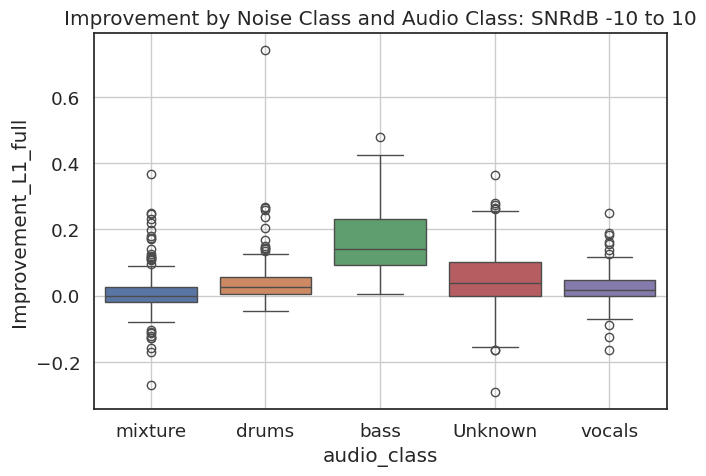

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_subset

# Create a grouped boxplot
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="noise_class", y="Improvement_L1_full", hue="audio_class", data=df)


# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.savefig(output_path + f"boxplot_all_L1_full.png")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 'crowd' noise class
df_crowd = df_subset[df_subset["noise_class"] == "Crowd"].copy()

# Create a grouped boxplot
plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="audio_class", y="Improvement_L1_full", hue="audio_class", data=df_crowd)


# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks()
#plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.savefig(output_path + f"boxplot_crowd_L1_full.png")
plt.show()


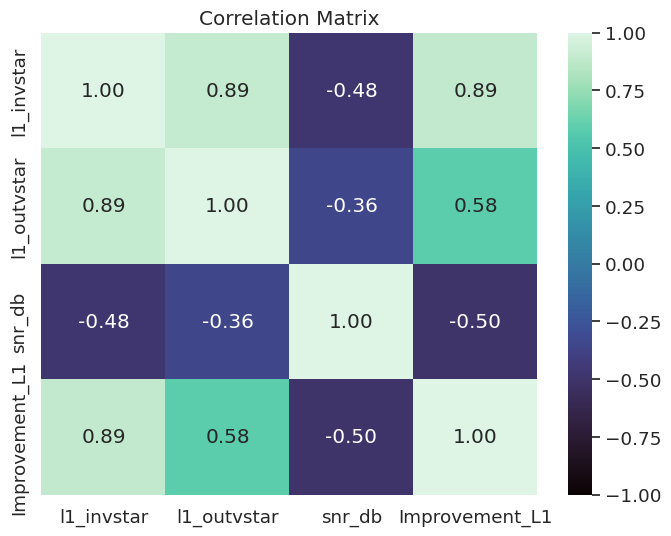

In [55]:
import pandas as pd

# Assuming you already have the dataframe loaded in `df`
# df = pd.read_csv('your_data.csv')  # Uncomment if loading from CSV
df = df_subset

# You can also add visualization here if you want to dive deeper
import seaborn as sns
import matplotlib.pyplot as plt

# Define a more interpretable colormap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['l1_invstar', 'l1_outvstar', 'snr_db', 'Improvement_L1']].corr(),
            annot=True, cmap='mako', fmt=".2f", vmin=-1, vmax=1, center=0)

plt.title("Correlation Matrix")
plt.show()


In [56]:
# Save subset dataframe
df_subset.to_csv(output_path + f"df_subset_SNRdB_{SNRdB[0]}-{SNRdB[1]}.csv", index=False)

In [57]:
import gc

# Delete large variables
del df_subset, df_eval, df

# Force garbage collection
gc.collect()

17437

# Improvements that need to be made

1. Metadata h5 column, including
- Filename
- SNR

## Convert some entire songs and test some metrics

In [58]:
from audioautoencoder.models.UNetConv8 import *

In [82]:
# --------------- In Loop Parameters --------------
model_name = 'UNetConv10_mask'
SNRdB_load = [-10, 10]
load_file = 'Autoencodermodel_earlystopping.pth'
load_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/{load_file}'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_one = UNetConv10().to(device)
denoiser = DenoisingLoader(model_one, load_path)
model_one = denoiser.model
print('Loaded Model')

/content/audioautoencoder/audioautoencoder/training.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=self.device)


Loaded model from /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv10_mask_-10-10/Autoencodermodel_earlystopping.pth
Loaded Model


In [83]:
import os

whole_files = '/content/drive/MyDrive/Datasets/Music/MUSDB18/test/'
song_files = []

# Walk through the directory tree
for root, dirs, files in os.walk(whole_files):
    # Filter files with '.wav' extension and 'mixture' in their name
    for f in files:
        if f.endswith('.wav') and 'mixture' in f:
            full_path = os.path.join(root, f)
            song_files.append(full_path)

print(f"\nTotal matching files: {len(song_files)}")


Total matching files: 50


Generate Audio

In [84]:
#noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/val/crowd noise (4)_xDoJJ9.wav'
#noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/val/plane-noise-passengers-sound_s8OrJQ.mp3'
#noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/val/Crowd - Mall ambience_UdLE4r.wav'
#noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test/Crowd - Cheering - Strong cheering and soft rhythmic cheering_Pxj5eZ.wav'
#noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test/Crowd - Street parade with music_FgF6cW.wav'
noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test/Robocup 2019 4.1_vTYYoj.mp3'

In [85]:
from audioautoencoder.denoising import *

In [86]:
def generate_audio_with_noise(audio_file, noise_file, start_time=10, duration=10,
                             signal_level=1, noise_level=0.1, sr=44100, plot=False):
    """
    Loads an audio file and a noise file, trims them, normalizes, and adds Gaussian noise.

    Parameters:
        audio_file (str): Path to the main audio file.
        noise_file (str): Path to the noise file.
        start_time (int): Start time (in seconds) for trimming.
        duration (int): Total duration (in seconds).
        signal_level (float): Scaling factor for the audio signal.
        noise_level (float): Scaling factor for the noise.
        sr (int): Expected sample rate (default: 44100 Hz).

    Returns:
        noisy_audio (np.array): Processed noisy audio.
        snr (float): Signal-to-noise ratio in dB.
    """
    # Load audio and noise
    audio, audio_sr = load_audio_file(audio_file)
    noise_waveform, noise_sr = load_audio_file(noise_file)

    if len(audio) == 2:
      audio = audio[0]

    if len(noise_waveform) == 2:
      noise_waveform = noise_waveform[0]

    # Trim audio and noise to the specified start time and duration

    audio = audio.cpu().numpy() if isinstance(audio, torch.Tensor) else audio
    noise_waveform = noise_waveform.cpu().numpy() if isinstance(noise_waveform, torch.Tensor) else noise_waveform

    print('Noise Sample Rate:', noise_sr)

    assert audio_sr == sr, f"Expected sample rate {sr}, but got {audio_sr}"

    # Trim audio and noise to the specified start time and duration
    audio = audio[start_time * sr : (start_time + duration) * sr]
    noise_waveform = noise_waveform[start_time * noise_sr : (start_time + duration) * noise_sr]

    # Normalize audio to [-1, 1]
    audio = np.clip((audio / np.max(np.abs(audio))) * signal_level, -1, 1)
    noise_waveform = np.clip((noise_waveform / np.max(np.abs(noise_waveform))) * noise_level, -1, 1)

    # Add noise to the signal
    noisy_audio = np.clip(audio + noise_waveform, -1, 1)

    # Compute SNR
    signal_power = np.mean(audio**2)
    noise_power = np.mean(noise_waveform**2)
    snr = 10 * np.log10(signal_power / noise_power)

    print(f"SNR: {snr:.2f} dB")

    # Plot results
    if plot:
        plt.figure(figsize=(10, 4))
        plt.plot(noise_waveform, label="Noise")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 4))
        plt.plot(audio, label="Clean Audio")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 4))
        plt.plot(noisy_audio, label="Noisy Audio")
        plt.legend()
        plt.show()

    return noisy_audio, sr

now the answer is to digest this waveform at 1s at a time, process those seconds, at intervals of 0.5s, window the outputs and put it back together for display on spectrograms and/or for output to .wav file

In [91]:
import os
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import soundfile as sf

def denoise_audio_chunk(chunk, sr, model, scalers, chunk_samples=2*44100, device=None):
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")

    features = extract_features(chunk, sr, audio_length=chunk_samples)
    transformed_features, metadata = transform_features(features, scalers)

    # AI denoising
    input_tensor = torch.tensor(np.array([transformed_features]), dtype=torch.float32).to(device)
    denoised = model(input_tensor)

    #input_array = input_tensor.detach().cpu().numpy()[0]
    denoised_array = denoised.detach().cpu().numpy()[0]

    denoised_spectrogram = reconstruct_spectrogram(denoised_array, metadata)
    #input_spectrogram = reconstruct_spectrogram(input_array, metadata)

    # Remove lower-than-average values from the spectrogram
    denoised_spectrogram = threshold_spectrogram(denoised_spectrogram, np.mean(denoised_spectrogram), percentage=0.5)

    # De-normalize
    denoised_spectrogram = inverse_scale(denoised_spectrogram, scalers)
    denoised_spectrogram = librosa.db_to_amplitude(denoised_spectrogram)

    output_chunk = magphase_to_waveform(denoised_spectrogram, features['phase'], chunk_samples)

    return output_chunk

class AudioDenoiser:
    def __init__(self, model_one, scalers, output_path, sample_rate=44100, chunk_duration=2, step_size=0.5, device=None):
        """
        Audio Denoising Pipeline using AI model.

        Parameters:
            model (torch.nn.Module): AI model for denoising.
            output_path (str): Directory to save output files.
            sample_rate (int): Sample rate (default 44100 Hz).
            chunk_duration (int): Duration of each chunk in seconds.
            step_size (float): Step size for overlap-add in seconds.
            device (str, optional): Device for PyTorch computation ("cuda" or "cpu").
        """
        self.model_one = model_one
        #self.model_two = model
        self.output_path = output_path
        self.sample_rate = sample_rate
        self.chunk_samples = sample_rate * chunk_duration
        self.scalers = scalers
        self.step_samples = int(self.chunk_samples * step_size)
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model_one.to(self.device)
        self.model_one.eval()
        #self.model_two.to(self.device)
        #self.model_two.eval()

    def process_audio(self, waveform, sr):
        """
        Processes audio by adding noise, chunking, denoising, and reconstructing.

        Parameters:
            input_path (str): Path to the input song file.
            noise_path (str): Path to the noise file.

        Returns:
            Tuple of (reconstructed_audio, reconstructed_audio_input).
        """
        # Load audio
        self.waveform = waveform
        assert sr == self.sample_rate, f"Sample rate mismatch: expected {self.sample_rate}, got {sr}"

        # Process in chunks
        processed_audio, processed_input = [], []
        for start in range(0, len(waveform) - self.chunk_samples + 1, self.step_samples):
            input_chunk = waveform[start:start + self.chunk_samples]

            # --- start denoising
            output_chunk = denoise_audio_chunk(input_chunk, sr, self.model_one, self.scalers, self.chunk_samples, self.device)
            #output_chunk = denoise_audio_chunk(output_chunk, sr, self.model_two, self.scalers, self.chunk_samples, self.device)

            processed_input.append(input_chunk)
            processed_audio.append(output_chunk)

        # Reconstruct waveform with overlap-add
        reconstructed_audio = self._overlap_add(processed_audio)
        reconstructed_audio_input = waveform #self._overlap_add(processed_input)

        # Save output
        self._save_audio(reconstructed_audio, "output_audio_song.wav")
        self._save_audio(reconstructed_audio_input, "input_audio_song.wav")

        # Plot spectrograms
        self._plot_spectrograms(reconstructed_audio, reconstructed_audio_input)

        return reconstructed_audio, reconstructed_audio_input

    def _overlap_add(self, chunks):
        """Reconstructs the waveform using overlap-add method."""
        reconstructed = np.zeros(len(self.waveform))
        weight = np.zeros(len(self.waveform))

        for i, start in enumerate(range(0, len(self.waveform) - self.chunk_samples + 1, self.step_samples)):
            reconstructed[start:start + self.chunk_samples] += chunks[i]
            weight[start:start + self.chunk_samples] += np.hanning(self.chunk_samples)

        reconstructed /= np.maximum(weight, 1e-6)
        reconstructed = np.clip(reconstructed, -1, 1)

        fade_in = int(self.sample_rate / 2)
        reconstructed[:fade_in] *= np.hanning(self.sample_rate)[:fade_in]
        reconstructed[-fade_in:] *= np.hanning(self.sample_rate)[-fade_in:]

        return reconstructed

    def _save_audio(self, audio, filename):
        """Saves the audio file."""
        output_filename = os.path.join(self.output_path, add_datetime_to_filename(filename))
        sf.write(output_filename, audio / np.max(audio), self.sample_rate)
        print(f"Saved: {output_filename}")

    def _plot_spectrograms(self, reconstructed_audio, reconstructed_audio_input):
        """Plots spectrograms of processed and input audio with consistent color scale."""

        import librosa
        import librosa.display
        import numpy as np
        import matplotlib.pyplot as plt

        # Compute Mel spectrograms
        Sxx1 = librosa.feature.melspectrogram(y=reconstructed_audio, sr=self.sample_rate, n_fft=2048, hop_length=1024)
        Sxx2 = librosa.feature.melspectrogram(y=reconstructed_audio_input, sr=self.sample_rate, n_fft=2048, hop_length=1024)

        # Convert to log scale (dB)
        Sxx1_db = librosa.amplitude_to_db(Sxx1, ref=np.max)
        Sxx2_db = librosa.amplitude_to_db(Sxx2, ref=np.max)

        # Compute shared color limits
        vmin, vmax = min(Sxx1_db.min(), Sxx2_db.min()), max(Sxx1_db.max(), Sxx2_db.max())

        # Create figure
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

        # Plot processed audio spectrogram
        img1 = librosa.display.specshow(Sxx1_db, sr=self.sample_rate, hop_length=1024, cmap="viridis", ax=axes[0], vmin=vmin, vmax=vmax)
        axes[0].set_title("Spectrogram of Processed Audio")
        axes[0].set_xlabel("Time (s)")
        axes[0].set_ylabel("Frequency (Hz)")

        # Plot input spectrogram
        img2 = librosa.display.specshow(Sxx2_db, sr=self.sample_rate, hop_length=1024, cmap="viridis", ax=axes[1], vmin=vmin, vmax=vmax)
        axes[1].set_title("Spectrogram of Input Audio")
        axes[1].set_xlabel("Time (s)")

        # Add shared colorbar
        fig.colorbar(img1, ax=axes, orientation="vertical", fraction=0.02, pad=0.02, label="Amplitude (dB)")

        plt.show()


def resample_feature(feature, target_shape):
    """Resamples a 2D numpy feature array to match target shape using torch.nn.functional.interpolate."""
    feature_tensor = torch.tensor(feature, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, H, W)
    target_size = (target_shape[0], target_shape[1])  # (new_H, new_W)

    resized_feature = F.interpolate(feature_tensor, size=target_size, mode="bilinear", align_corners=False)
    return resized_feature.squeeze(0).squeeze(0).numpy()  # Remove batch/channel dim and return as numpy

def transform_features(features, scalers):
    input_spectrogram = features['spectrogram']
    input_edges = features['edges']
    input_cepstrum = features['cepstrum']

    # function to transform the extracted features to an input to the
    target_shape = input_spectrogram.shape
    # Apply scalers
        #input_phase = self.scalers["input_features_phase"].transform(input_phase.reshape(1, -1)).reshape(input_phase.shape)
    input_spectrogram = scalers["input_features_spectrogram"].transform(input_spectrogram.reshape(1, -1)).reshape(input_spectrogram.shape)
    input_edges = scalers["input_features_edges"].transform(input_edges.reshape(1, -1)).reshape(input_edges.shape)
    input_cepstrum = scalers["input_features_cepstrum"].transform(input_cepstrum.reshape(1, -1)).reshape(input_cepstrum.shape)
    #input_cepstrum_edges = self.scalers["input_features_cepstrum_edges"].transform(input_cepstrum_edges.reshape(1, -1)).reshape(input_cepstrum_edges.shape)

    # resample mfcc featues so theyre the same shape as the spectrogram and phase features
    # Define frequency bins
    sampling_rate = 44100  # 44.1 kHz audio
    n_fft = 2048  # Adjust this for better resolution
    freqs = np.linspace(0, sampling_rate / 2, n_fft // 2 + 1)  # STFT frequency bins

    # Find indices corresponding to 0–4000 Hz
    min_freq, hf, mf, lf = 0, 4000, 1000, 200
    freq_indices_hf = np.where((freqs >= min_freq) & (freqs <= hf))[0]
    freq_indices_mf = np.where((freqs >= min_freq) & (freqs <= mf))[0]
    freq_indices_lf = np.where((freqs >= min_freq) & (freqs <= lf))[0]
    # input spectrogram
    input_spectrogram_hf = resample_feature(input_spectrogram[freq_indices_hf, :], target_shape)
    input_spectrogram_mf = resample_feature(input_spectrogram[freq_indices_mf, :], target_shape)
    input_spectrogram_lf = resample_feature(input_spectrogram[freq_indices_lf, :], target_shape)
    # edges
    input_edges_hf = resample_feature(input_edges[freq_indices_hf, :], target_shape)
    input_edges_mf = resample_feature(input_edges[freq_indices_mf, :], target_shape)
    input_edges_lf = resample_feature(input_edges[freq_indices_lf, :], target_shape)

    # now input indices for 0-1000 and 0-200 to add as channels and as freq_indicies for reconstruction

    # Resample MFCC features
    input_cepstrum = resample_feature(input_cepstrum, target_shape)

    # Convert to tensors - input_phase, is missing,..... it's too confusing
    inputs = torch.tensor(np.stack([
        input_spectrogram, input_spectrogram_hf, input_spectrogram_mf, input_spectrogram_lf,
        input_edges, input_edges_hf, input_edges_mf, input_edges_lf,
        input_cepstrum
    ], axis=0), dtype=torch.float32)  # Shape: (6, H, W)

    a = 3
    inputs = (inputs/a) + 0.5

    # metadata
    # Extract metadata
    metadata = {
        "hf_shape": input_spectrogram[freq_indices_hf, :].shape,
        "mf_shape": input_spectrogram[freq_indices_mf, :].shape,
        "lf_shape": input_spectrogram[freq_indices_lf, :].shape,
        "freq_indices_hf": freq_indices_hf,
        "freq_indices_mf": freq_indices_mf,
        "freq_indices_lf": freq_indices_lf
    }

    return inputs, metadata

def reconstruct_spectrogram(outputs, metadata):
    # lets evaluate this from a l1 loss perspective
    # reconstruct spectrogram
    out_spectrogram = np.array(outputs[0])
    out_spectrogram[metadata["freq_indices_hf"], :] = resample_feature(outputs[1], metadata["hf_shape"])
    out_spectrogram[metadata["freq_indices_mf"], :] = resample_feature(outputs[2], metadata["mf_shape"])
    out_spectrogram[metadata["freq_indices_lf"], :] = resample_feature(outputs[3], metadata["lf_shape"])
    return out_spectrogram

def inverse_scale(out_spectrogram, scalers):
    # inverse scale the
    # transform back to 0 centred and
    out_spectrogram = (out_spectrogram - 0.5) * 3
    out_spec_shape = out_spectrogram.shape

    # undo scaler
    out_spectrogram = scalers["input_features_spectrogram"].inverse_transform(np.array([out_spectrogram]).reshape(1, -1)).reshape(out_spec_shape)
    return out_spectrogram

def threshold_spectrogram(spectrogram, threshold, percentage=0.8):
    """
    Zeroes out all values in the spectrogram that are below the given threshold.

    Args:
        spectrogram (np.ndarray): Input 2D array.
        threshold (float): The threshold value.

    Returns:
        np.ndarray: The processed spectrogram with values below threshold set to zero.
    """
    spectrogram = np.where(spectrogram >= threshold * percentage, spectrogram, 0)
    return spectrogram

def magphase_to_waveform(magnitude, phase, audio_length=44100):
    """
    Converts a spectrogram image back into an audio waveform.

    Parameters:
        image (np.array): Spectrogram image (3 channels).
        sr (int): Sampling rate.

    Returns:
        np.array: Reconstructed audio waveform.
    """
    stft = magnitude * np.exp(1j * phase)
    return librosa.istft(stft, length=audio_length)

In [114]:
file_number = 25
noisy_audio, sr = generate_audio_with_noise(song_files[file_number], noise_file, start_time=20, duration=10, noise_level=0.7)

Noise Sample Rate: 44100
SNR: 5.52 dB


Saved: /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv10_mask_-10-10/output_audio_song_20250308_092801.wav
Saved: /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv10_mask_-10-10/input_audio_song_20250308_092801.wav


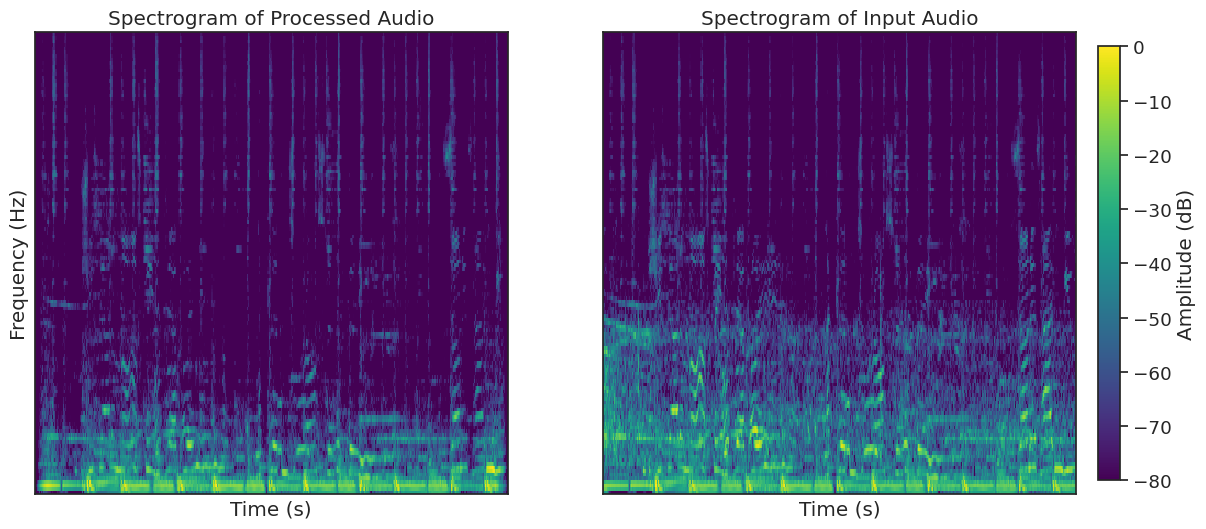

In [115]:
denoiser = AudioDenoiser(model_one, scalers, output_path=output_path, chunk_duration=2, step_size=0.5)
reconstructed_audio, reconstructed_input = denoiser.process_audio(noisy_audio, sr)

In [116]:
import soundfile as sf
from google.colab import files

def save_wav_sf(file_path, audio_array, sample_rate):
    """Saves a NumPy array as a WAV file using soundfile."""
    sf.write(file_path, audio_array, sample_rate, subtype="PCM_16")  # Can be PCM_24, PCM_32, FLOAT
    files.download(file_path)  # Trigger download in Colab

save_wav_sf(f"output_{file_number}.wav", reconstructed_audio, sr)
save_wav_sf(f"input_{file_number}.wav", reconstructed_input, sr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install mir_eval

Use the SDR metric to compare signal to noise ratios of the generated output, and the standard output and demonstrate an increase in signal to noise ratio overall

In [ ]:
average_rec = np.log(np.average(Pxx_rec, axis=1))
average_spec = np.log(np.average(Pxx_spec, axis=1))

plt.plot(average_rec)
plt.plot(average_spec)
plt.xscale('log')
plt.show()

import numpy as np
import mir_eval

def compute_sdr(reference, estimated):
    """
    Compute the Signal-to-Distortion Ratio (SDR) between reference and estimated signals.

    :param reference: np.ndarray of shape (channels, samples), ground-truth clean signal
    :param estimated: np.ndarray of shape (channels, samples), predicted separated signal
    :return: float, SDR value in dB
    """
    # Ensure inputs are 2D (stereo/multichannel) or 1D (mono)
    reference = np.atleast_2d(reference)
    estimated = np.atleast_2d(estimated)

    # Compute SDR using mir_eval
    sdr, _, _, _ = mir_eval.separation.bss_eval_sources(reference, estimated, compute_permutation=False)

    return np.mean(sdr)  # Return average SDR across channels

# Example usage
if __name__ == "__main__":
    # Fake reference and estimated signals (replace with actual signals)
    ref_signal = reconstructed_audio_input  # 2 channels, 1 second at 44.1kHz
    est_signal = reconstructed_audio  # Slightly noisy estimate

    # max sdr
    sdr_max = compute_sdr(audio, audio)
    print(f"SDR - : {sdr_max:.2f} dB -- Max")

    # reference sdr
    sdr_ref = compute_sdr(audio, noisy_audio)
    print(f"SDR - : {sdr_ref:.2f} dB -- Reference")

    # computed srd
    sdr_value = compute_sdr(audio, est_signal)
    print(f"SDR - : {sdr_value:.2f} dB -- Denoising")
